# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [128]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_group=[]
lat = []
lng = []
max_temp = []
hum=[]
cloud=[]
wind=[]
country=[]
date=[]

print("Beginning Data Retrieval\n---------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        city_group.append(response['name'])
        print(f"Processing Record {cities.index(city)} of Set 1 | {city}")  
        
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")

print("---------------------------------------\nData Retrieval Complete\n---------------------------------------")

        

Beginning Data Retrieval
---------------------------------------
Processing Record 0 of Set 1 | norman wells
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | lasem
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | torbay
Missing field/result... skipping.
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | port antonio
Processing Record 10 of Set 1 | laela
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | saint-georges
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tomar do geru
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | vestmannaeyjar
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | mackay
Missing field/result... skipping.
Missing field/result... skipping.
P

Processing Record 197 of Set 1 | luderitz
Processing Record 198 of Set 1 | codrington
Processing Record 199 of Set 1 | makakilo city
Processing Record 200 of Set 1 | sao joao da barra
Processing Record 201 of Set 1 | behshahr
Processing Record 202 of Set 1 | oriximina
Processing Record 203 of Set 1 | lovington
Processing Record 204 of Set 1 | san jose de buan
Missing field/result... skipping.
Processing Record 206 of Set 1 | vysokogornyy
Missing field/result... skipping.
Processing Record 208 of Set 1 | wad rawah
Processing Record 209 of Set 1 | arraial do cabo
Processing Record 210 of Set 1 | yabelo
Processing Record 211 of Set 1 | port-gentil
Processing Record 212 of Set 1 | east london
Processing Record 213 of Set 1 | te anau
Processing Record 214 of Set 1 | vuktyl
Processing Record 215 of Set 1 | macenta
Processing Record 216 of Set 1 | sisimiut
Processing Record 217 of Set 1 | mount pleasant
Processing Record 218 of Set 1 | ayan
Processing Record 219 of Set 1 | pemba
Processing Re

Processing Record 395 of Set 1 | san miguel
Processing Record 396 of Set 1 | pehowa
Processing Record 397 of Set 1 | harnosand
Processing Record 398 of Set 1 | sehithwa
Processing Record 399 of Set 1 | jacareacanga
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 402 of Set 1 | santander
Processing Record 403 of Set 1 | augusto correa
Missing field/result... skipping.
Processing Record 405 of Set 1 | bongaree
Processing Record 406 of Set 1 | boma
Processing Record 407 of Set 1 | beringovskiy
Processing Record 408 of Set 1 | sinnai
Missing field/result... skipping.
Processing Record 410 of Set 1 | hearst
Processing Record 411 of Set 1 | bilma
Processing Record 412 of Set 1 | alexander city
Processing Record 413 of Set 1 | kollam
Missing field/result... skipping.
Processing Record 415 of Set 1 | klyuchi
Processing Record 416 of Set 1 | vikhorevka
Missing field/result... skipping.
Processing Record 418 of Set 1 | port blair
Processing Record 419 of Set

Processing Record 592 of Set 1 | diego de almagro
Processing Record 593 of Set 1 | hami
Processing Record 594 of Set 1 | chipinge
Processing Record 595 of Set 1 | hirara
Missing field/result... skipping.
Processing Record 597 of Set 1 | puerto quijarro
Processing Record 598 of Set 1 | mitchell
Processing Record 599 of Set 1 | hambantota
Processing Record 600 of Set 1 | kochinda
Processing Record 601 of Set 1 | ozernovskiy
Missing field/result... skipping.
Processing Record 603 of Set 1 | abu dhabi
Processing Record 604 of Set 1 | hadejia
Processing Record 605 of Set 1 | kalmunai
Missing field/result... skipping.
Processing Record 607 of Set 1 | panji
Processing Record 608 of Set 1 | gumla
Processing Record 609 of Set 1 | oktyabrskiy
Processing Record 610 of Set 1 | san quintin
Processing Record 611 of Set 1 | westport
Processing Record 612 of Set 1 | chaman
Processing Record 613 of Set 1 | baker city
Processing Record 614 of Set 1 | port hueneme
Processing Record 615 of Set 1 | san pol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
weather_dict = {
    "City": city_group,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity" : hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date    
}


In [83]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Deputatsky,69.30,139.90,62.78,43,100,13.27,RU,1595135636
1,Bluff,-46.60,168.33,39.00,83,26,3.00,NZ,1595135621
2,Punta Arenas,-53.15,-70.92,33.80,80,99,18.34,CL,1595135464
3,Hobart,-42.88,147.33,60.01,54,40,5.82,AU,1595135525
4,Camacha,33.08,-16.33,69.80,83,40,11.41,PT,1595135996
5,Turukhansk,65.82,87.98,61.03,52,1,3.62,RU,1595135997
6,Ushuaia,-54.80,-68.30,30.20,100,90,8.05,AR,1595135600
7,Upernavik,72.79,-56.15,46.65,59,16,4.03,GL,1595135639
8,Atuona,-9.80,-139.03,79.07,79,44,16.73,PF,1595135615
9,Ondjiva,-17.07,15.73,43.75,60,0,6.55,AO,1595135998


In [84]:
weather_data.to_csv("weather_data_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [85]:
hum_100 = weather_data.loc[weather_data["Humidity"] > 100, :]


In [86]:
#  Get the indices of cities that have humidity over 100%.
indexNames = weather_data[weather_data['Humidity'] > 100].index



list(hum_100.index)

[]

In [88]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(indexNames , inplace=False)

clean_city_data.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Deputatsky,69.30,139.90,62.78,43,100,13.27,RU,1595135636
1,Bluff,-46.60,168.33,39.00,83,26,3.00,NZ,1595135621
2,Punta Arenas,-53.15,-70.92,33.80,80,99,18.34,CL,1595135464
3,Hobart,-42.88,147.33,60.01,54,40,5.82,AU,1595135525
4,Camacha,33.08,-16.33,69.80,83,40,11.41,PT,1595135996


In [89]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("clean_city.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

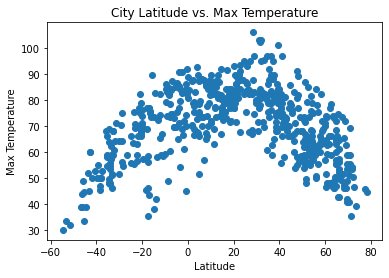

In [92]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

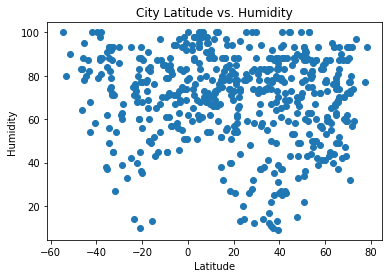

In [93]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

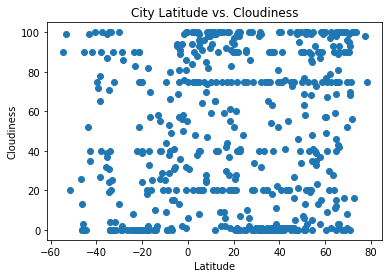

In [94]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

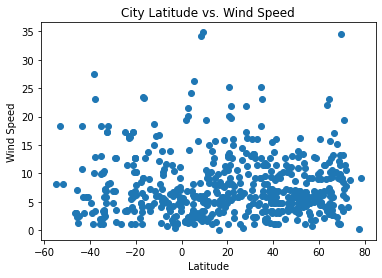

In [95]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [99]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_data.loc[weather_data["Lat"] > 0, :]
north_hem


south_hem = weather_data.loc[weather_data["Lat"] < 0, :]
south_hem


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bluff,-46.60,168.33,39.00,83,26,3.00,NZ,1595135621
2,Punta Arenas,-53.15,-70.92,33.80,80,99,18.34,CL,1595135464
3,Hobart,-42.88,147.33,60.01,54,40,5.82,AU,1595135525
6,Ushuaia,-54.80,-68.30,30.20,100,90,8.05,AR,1595135600
8,Atuona,-9.80,-139.03,79.07,79,44,16.73,PF,1595135615
...,...,...,...,...,...,...,...,...,...
545,Necochea,-38.55,-58.74,46.99,98,27,1.01,AR,1595136158
546,Ancud,-41.87,-73.82,50.00,100,90,5.82,CL,1595135620
549,Codrington,-38.27,141.97,45.43,87,78,27.40,AU,1595135640
553,Waingapu,-9.66,120.26,84.20,61,9,12.21,ID,1595136135


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

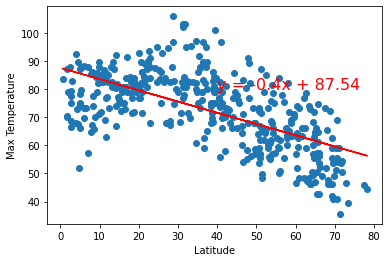

In [105]:
from scipy import stats

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

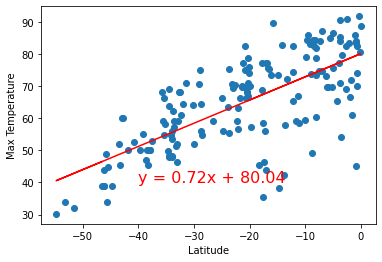

In [107]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

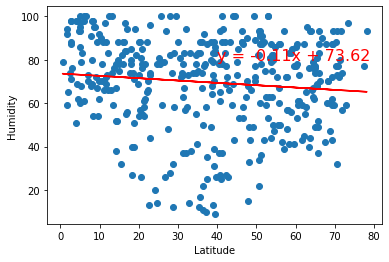

In [108]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

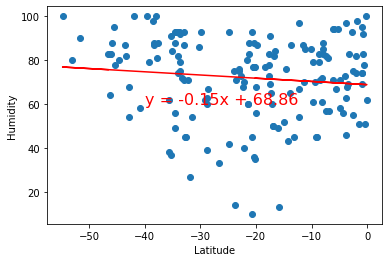

In [120]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

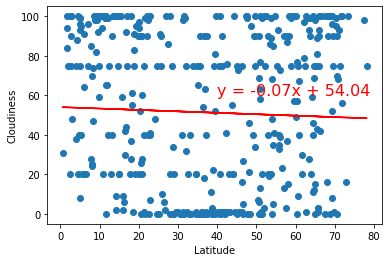

In [119]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

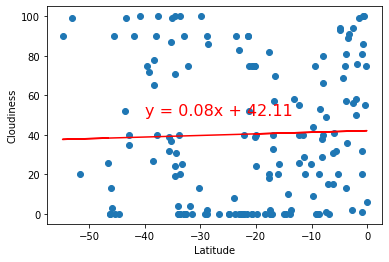

In [117]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

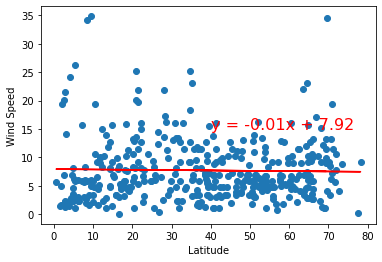

In [114]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

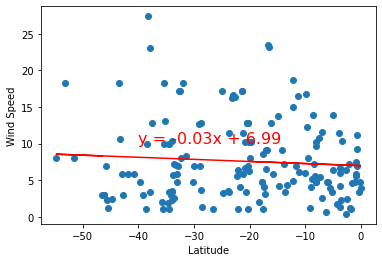

In [116]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()